## EDA Ames Housing Data - Jesse

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.set_option('display.max_columns',None)

#### Our teammates first went through the categorical features and removed some outliers to start cleaning the data.

In [50]:
housing = pd.read_csv('Ames_Housing_Price_Data_CLEAN.csv', index_col=0)
print(housing.shape)
housing.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Ames_Housing_Price_Data_CLEAN.csv'

#### We decided to use SalePrice Per Gross Living Area as the target variable.

In [4]:
housing["SalePricePerGLA"] = housing['SalePrice']/housing['GrLivArea']

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 1 to 1000
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2553 non-null   int64  
 1   GrLivArea        2553 non-null   int64  
 2   SalePrice        2553 non-null   int64  
 3   MSSubClass       2553 non-null   int64  
 4   MSZoning         2553 non-null   object 
 5   LotFrontage      2096 non-null   float64
 6   LotArea          2553 non-null   int64  
 7   Street           2553 non-null   object 
 8   Alley            168 non-null    object 
 9   LotShape         2553 non-null   object 
 10  LandContour      2553 non-null   object 
 11  Utilities        2553 non-null   object 
 12  LotConfig        2553 non-null   object 
 13  LandSlope        2553 non-null   object 
 14  Neighborhood     2553 non-null   object 
 15  Condition1       2553 non-null   object 
 16  Condition2       2553 non-null   object 
 17  BldgType      

### Handling Nulls

In [6]:
nulls = housing.isnull().sum()
null_count= nulls[nulls > 0].sort_values(ascending= False)
null_count

PoolQC          2545
MiscFeature     2462
Alley           2385
Fence           2033
FireplaceQu     1230
LotFrontage      457
GarageYrBlt      126
GarageCond       126
GarageQual       126
GarageFinish     126
GarageType       124
BsmtExposure      68
BsmtFinType2      67
BsmtCond          66
BsmtQual          66
BsmtFinType1      66
MasVnrType        14
MasVnrArea        14
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
Electrical         1
dtype: int64

### Getting a Percent of Nulls to Total by Column

In [16]:
null_df = pd.DataFrame(null_count / len(housing))
null_df.columns=['%_null']
null_df

,%_null
PoolQC,0.996866
MiscFeature,0.964356
Alley,0.934195
Fence,0.796318
FireplaceQu,0.481786
LotFrontage,0.179005
GarageYrBlt,0.049354
GarageCond,0.049354
GarageQual,0.049354
GarageFinish,0.049354


#### All of the categorical features had an 'NA' value that was missing, so we replaced the null values with 'NA'.

In [7]:
housing[['PoolQC', 'FireplaceQu', 'MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageFinish','GarageCond', 
         'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']] = housing[['PoolQC', 
         'FireplaceQu', 'MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageFinish', 'GarageCond',
         'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']].replace(np.nan,'NA')

housing[['MasVnrType']] = housing[['MasVnrType']].replace(np.nan,'None')
housing[['MasVnrType']] = housing[['MasVnrType']].replace('None','NA')

#### For most of the numerical features, we had went with replacing the null values with 0.

In [8]:
housing[['MasVnrArea','TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageArea', 'GarageCars', 'BsmtHalfBath', 
         'BsmtFullBath']] = housing[['MasVnrArea', 'TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1','GarageArea', 
         'GarageCars', 'BsmtHalfBath','BsmtFullBath']].replace(np.nan, 0) 

#### For Electrical, most newer houses had Standard Circuit Breakers & Romex, so we used that for this feature.

In [9]:
housing[['Electrical']] = housing[['Electrical']].replace(np.nan, 'SBrkr')

#### The last two features had several nulls and were not easy to determine how to handle them.

In [10]:
housing[['GarageYrBlt', 'LotFrontage']].describe()

,GarageYrBlt,LotFrontage
count,2427.000000,2096.000000
mean,1977.079934,68.530534
std,24.665533,22.882120
min,1895.000000,21.000000
25%,1960.000000,57.000000
50%,1978.000000,68.000000
75%,2000.000000,80.000000
max,2010.000000,313.000000


<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

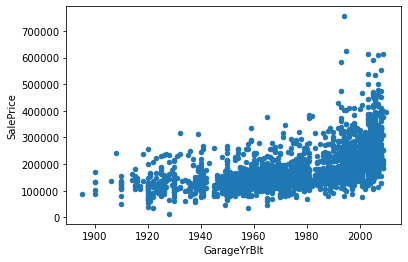

In [11]:
housing[['GarageYrBlt', 'SalePrice']].plot(kind='scatter', x='GarageYrBlt', y='SalePrice')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

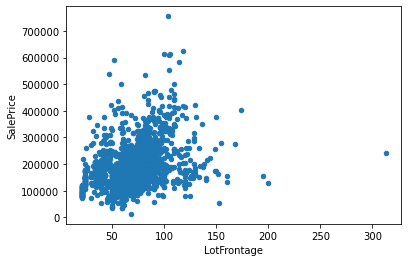

In [11]:
housing[['LotFrontage', 'SalePrice']].plot(kind='scatter', x='LotFrontage', y='SalePrice')

#### We decided to use random numbers between the min and the max to fill in the null values. There was a potential outlier in Lot Frontage, we used the second highest number as the max.

In [12]:
import random
random.seed(1)
for i in range(1,127):
    n = random.randint(1895,2010)
    housing[['GarageYrBlt']]= housing[['GarageYrBlt']].replace(np.nan, n)

In [13]:
random.seed(1)
for i in range(1,458):
    n = random.randint(21,200)
    housing[['LotFrontage']]= housing[['LotFrontage']].replace(np.nan, n)

In [14]:
housing.shape

(2553, 82)

#### Then we looked at the correlations of the features.

<AxesSubplot:>

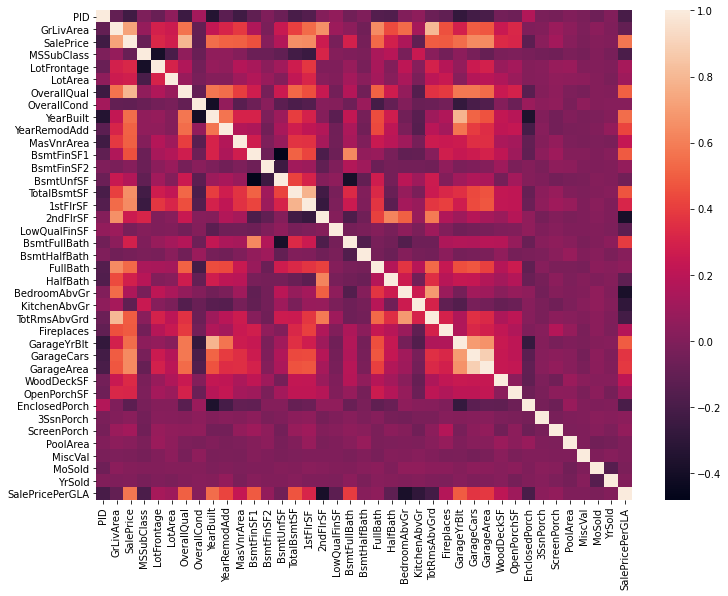

In [15]:
plt.figure(figsize=(12, 9))
sns.heatmap(housing.corr())

#### These are the top features that are heavily correlated to be aware of in avoiding multicollinearity. 

In [16]:
housing.corr().unstack().sort_values(ascending= False).drop_duplicates().head(20)

SalePricePerGLA  SalePricePerGLA    1.000000
GarageCars       GarageArea         0.889129
GrLivArea        TotRmsAbvGrd       0.806748
SalePrice        OverallQual        0.792510
GarageYrBlt      YearBuilt          0.788541
1stFlrSF         TotalBsmtSF        0.783627
SalePrice        GrLivArea          0.723536
GarageYrBlt      GarageCars         0.694100
TotRmsAbvGrd     BedroomAbvGr       0.691686
GarageArea       GarageYrBlt        0.669277
2ndFlrSF         GrLivArea          0.663564
TotalBsmtSF      SalePrice          0.654793
FullBath         GrLivArea          0.645672
1stFlrSF         SalePrice          0.644983
SalePrice        GarageCars         0.640041
                 GarageArea         0.636669
BsmtFullBath     BsmtFinSF1         0.635159
2ndFlrSF         HalfBath           0.623710
                 TotRmsAbvGrd       0.585331
OverallQual      GarageYrBlt        0.582275
dtype: float64

#### These are correlations of the features to SalePrice and SalePrice per Gross Living Area.

In [17]:
housing.corr().unstack()['SalePrice'].sort_values(ascending= False).head(50)

SalePrice          1.000000
OverallQual        0.792510
GrLivArea          0.723536
TotalBsmtSF        0.654793
1stFlrSF           0.644983
GarageCars         0.640041
GarageArea         0.636669
SalePricePerGLA    0.576109
GarageYrBlt        0.546510
YearBuilt          0.543338
FullBath           0.536544
YearRemodAdd       0.512453
MasVnrArea         0.504225
TotRmsAbvGrd       0.494511
Fireplaces         0.490022
BsmtFinSF1         0.460731
WoodDeckSF         0.333844
LotFrontage        0.320292
OpenPorchSF        0.313747
BsmtFullBath       0.289044
HalfBath           0.287455
LotArea            0.278949
2ndFlrSF           0.263649
BsmtUnfSF          0.170397
BedroomAbvGr       0.154139
ScreenPorch        0.118871
3SsnPorch          0.030866
PoolArea           0.025825
BsmtFinSF2         0.020981
MoSold             0.012402
YrSold             0.001910
MiscVal           -0.016810
LowQualFinSF      -0.027831
BsmtHalfBath      -0.033741
MSSubClass        -0.084747
OverallCond       -0

In [18]:
housing.corr().unstack()['SalePricePerGLA'].sort_values(ascending= False).head(50)

SalePricePerGLA    1.000000
SalePrice          0.576109
YearBuilt          0.548032
OverallQual        0.507225
GarageYrBlt        0.492698
BsmtFinSF1         0.485620
TotalBsmtSF        0.472776
YearRemodAdd       0.423569
BsmtFullBath       0.397293
GarageArea         0.386650
GarageCars         0.373462
1stFlrSF           0.313144
MasVnrArea         0.235606
WoodDeckSF         0.212244
Fireplaces         0.176767
LotFrontage        0.127292
LotArea            0.103341
OpenPorchSF        0.099345
BsmtFinSF2         0.064329
ScreenPorch        0.059362
FullBath           0.050515
3SsnPorch          0.035386
BsmtHalfBath       0.027105
OverallCond        0.018524
YrSold             0.009645
MiscVal           -0.002039
PoolArea          -0.005551
MoSold            -0.014470
BsmtUnfSF         -0.051978
GrLivArea         -0.104384
HalfBath          -0.119539
LowQualFinSF      -0.126220
MSSubClass        -0.191208
EnclosedPorch     -0.194383
PID               -0.201626
TotRmsAbvGrd      -0

#### Visualizations of features compared to SalePrice.

In [19]:
#for SalePrice
housing_sp= housing[['GrLivArea','LotFrontage', 'LotArea','MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal','GarageYrBlt', 'YearBuilt', 'YearRemodAdd']]

housing_sp2= housing[['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'MSSubClass', 'MoSold', 'YrSold']]

#for SalePrice per Gross Living Area
housing_spg= housing[['LotFrontage', 'LotArea','MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal','GarageYrBlt', 'YearBuilt', 'YearRemodAdd']]

In [21]:
x1= housing_sp.columns
x2= housing_sp2.columns
y= "SalePrice"

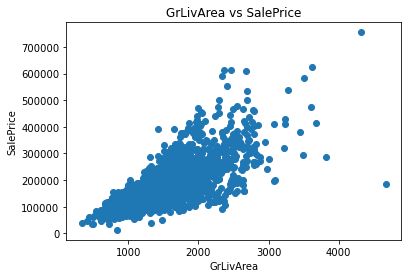

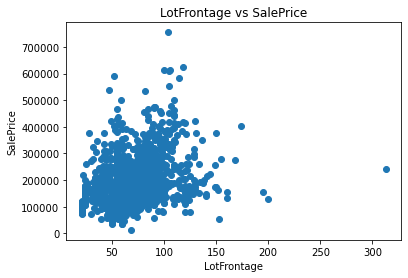

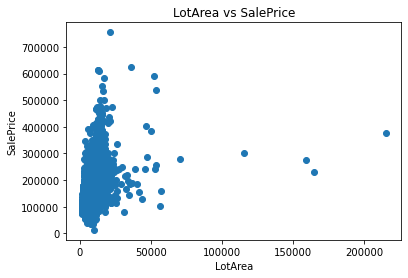

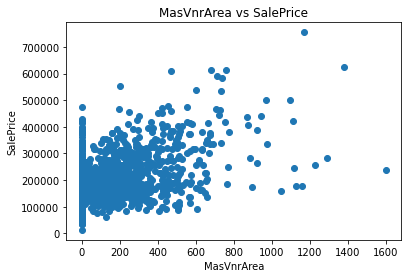

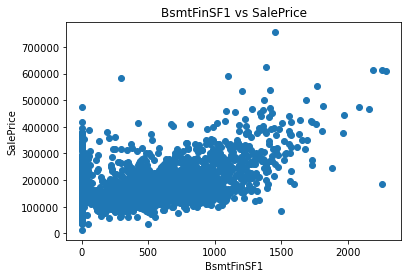

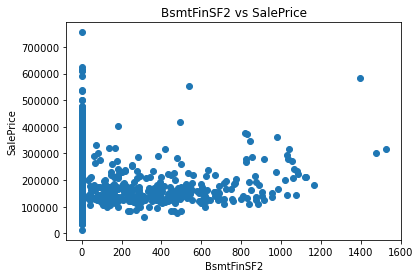

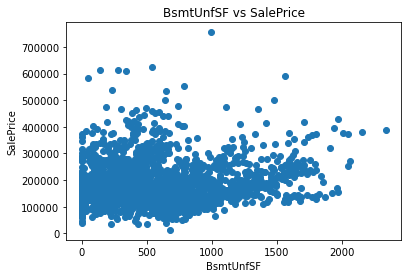

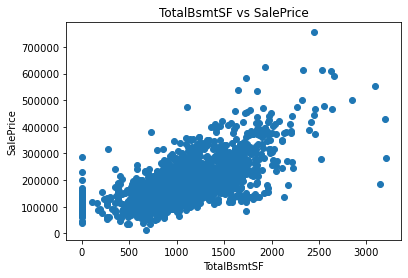

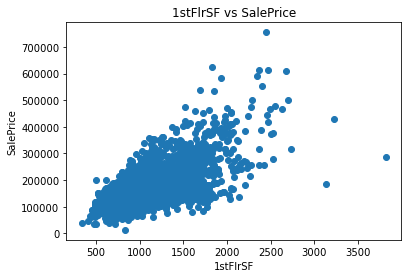

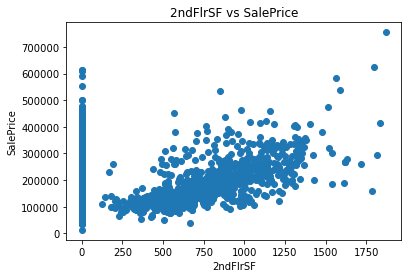

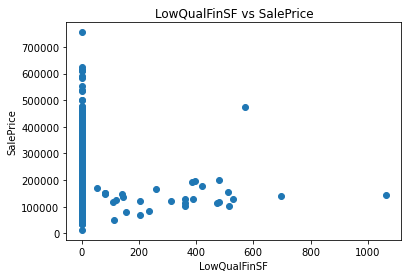

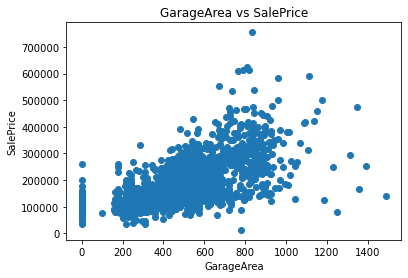

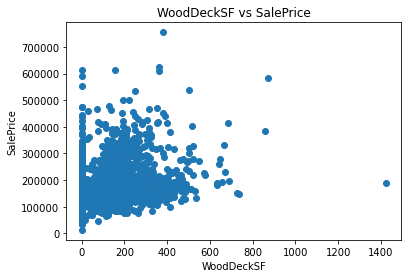

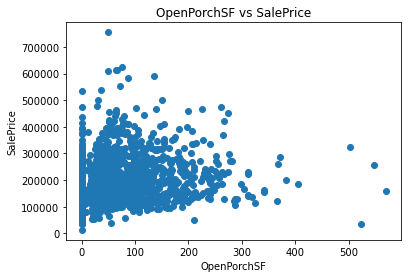

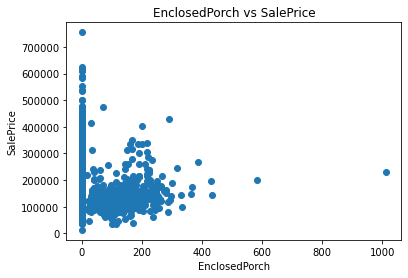

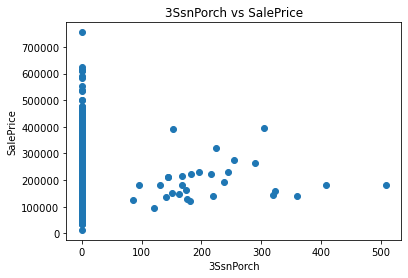

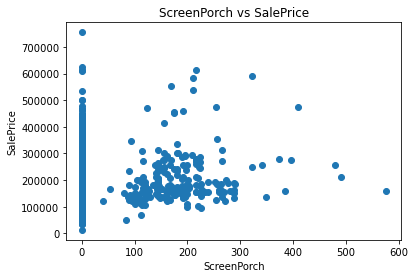

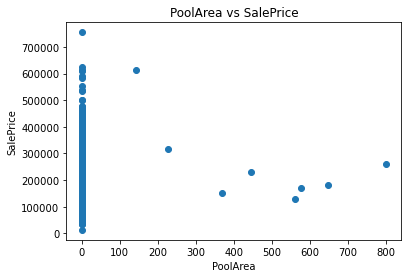

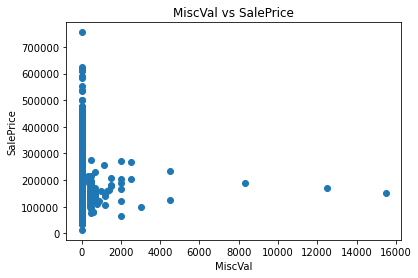

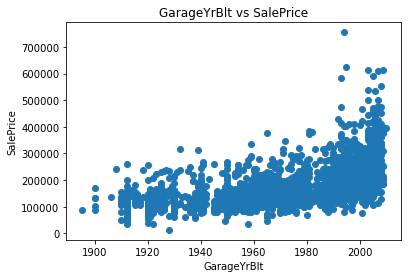

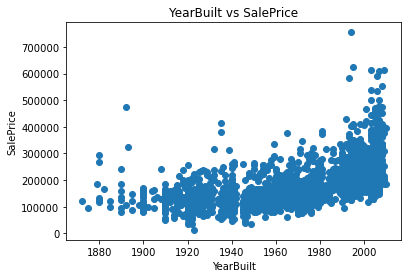

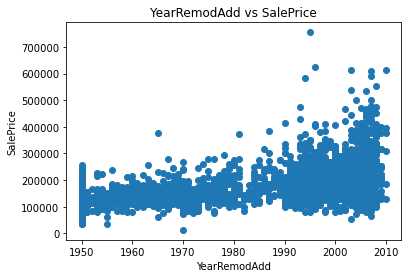

In [22]:
for x in x1:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(housing[x], housing[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title("{} vs {}".format(x, y))
    plt.show()

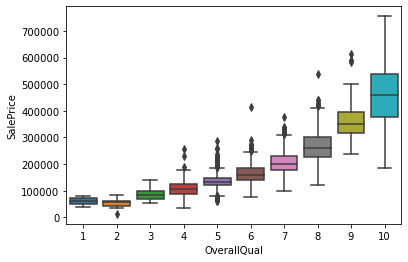

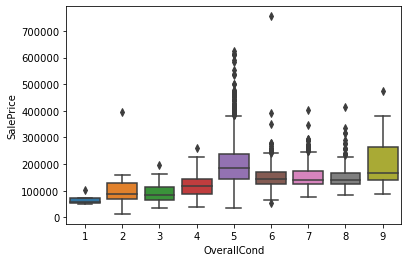

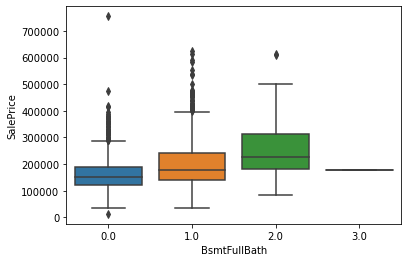

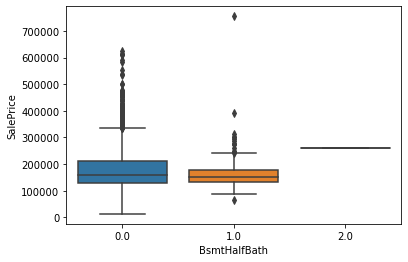

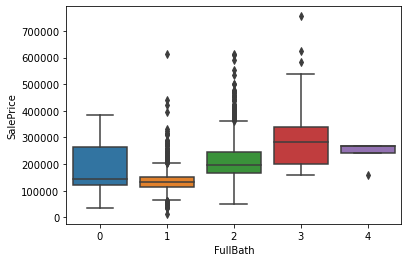

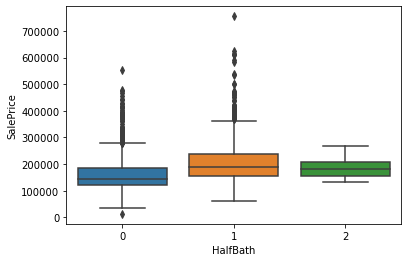

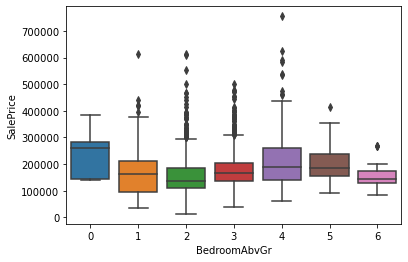

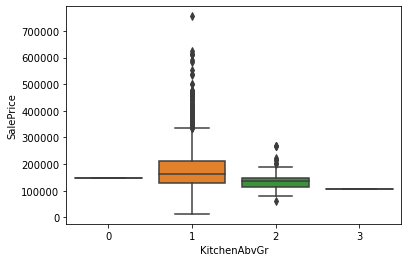

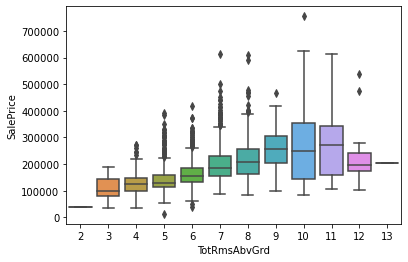

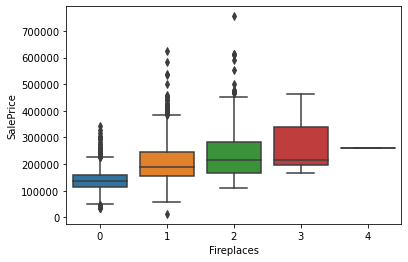

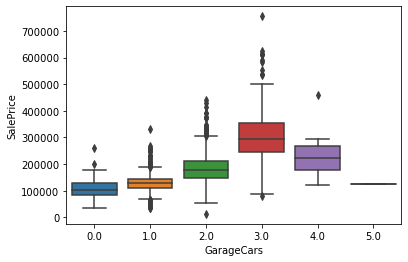

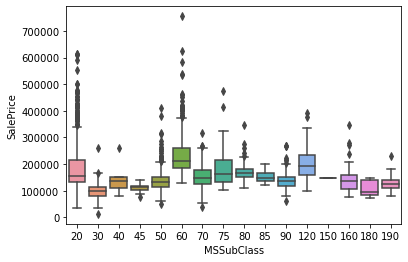

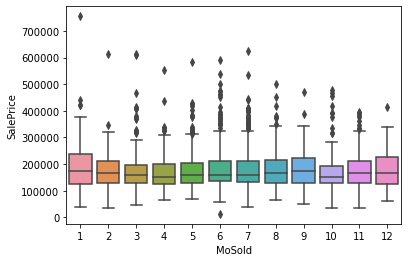

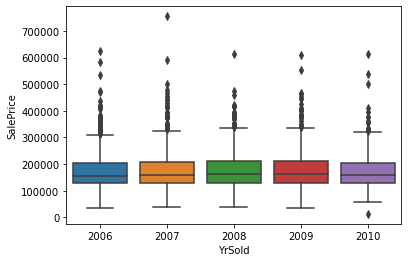

In [23]:
for x in x2:
    data = pd.concat([housing['SalePrice'], housing[x]], axis=1)
    ax = sns.boxplot(x=x, y=y, data=data)   
    plt.show()

#### Visualizations of features compared to SalePrice per Gross Living Area. 

In [25]:
x3= housing_spg.columns
y1= "SalePricePerGLA"

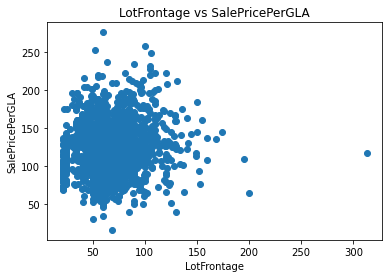

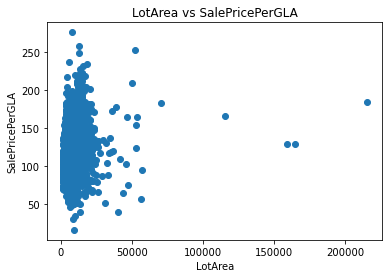

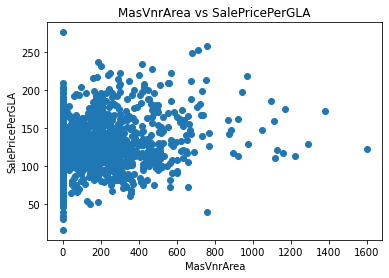

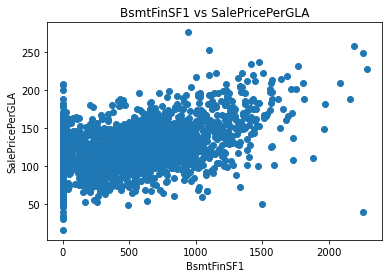

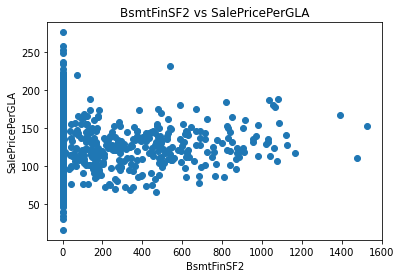

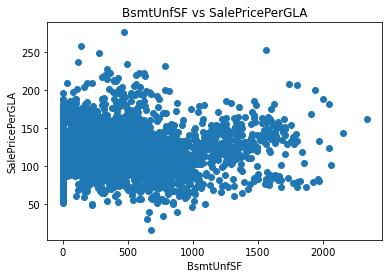

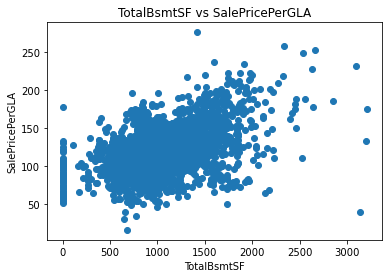

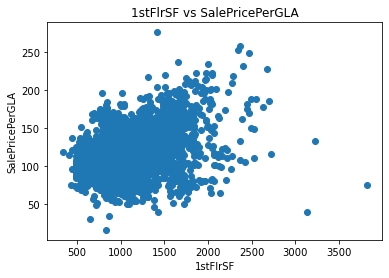

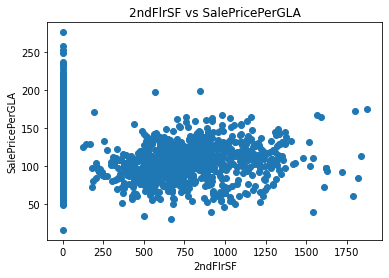

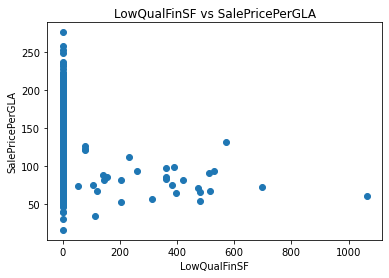

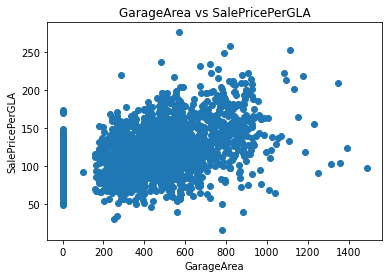

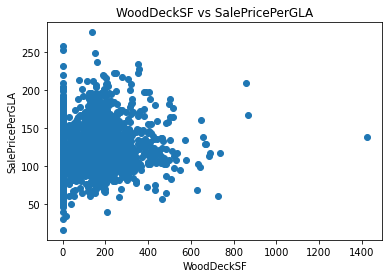

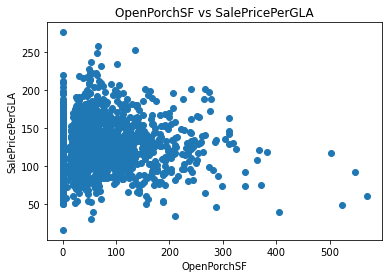

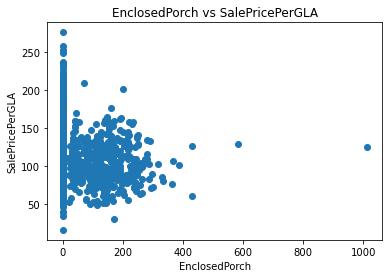

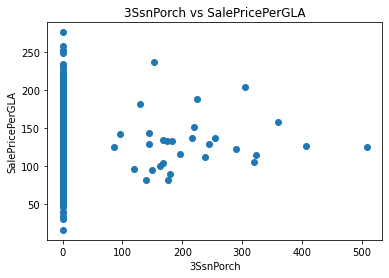

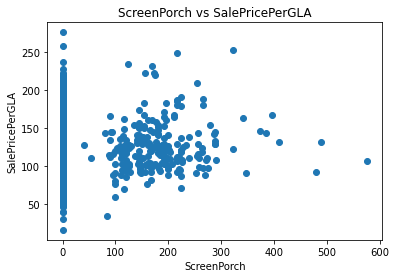

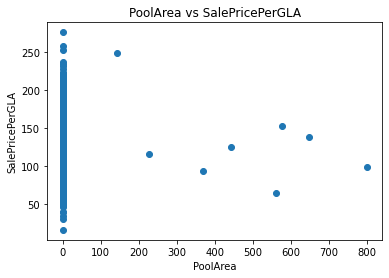

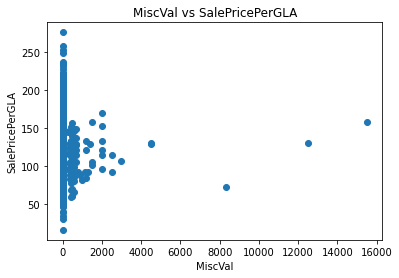

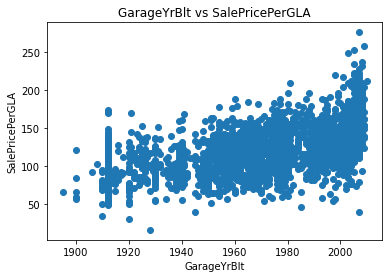

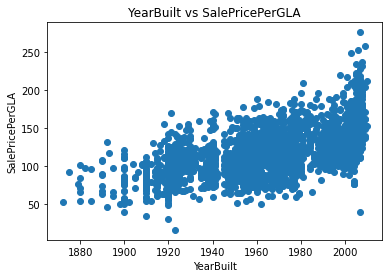

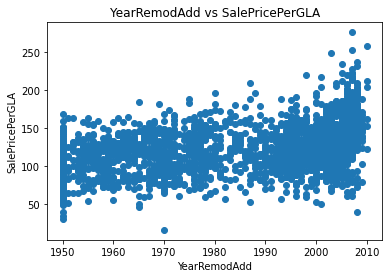

In [26]:
for x in x3:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(housing[x], housing[y1])
    ax.set_xlabel(x)
    ax.set_ylabel(y1)
    ax.set_title("{} vs {}".format(x, y1))
    plt.show()

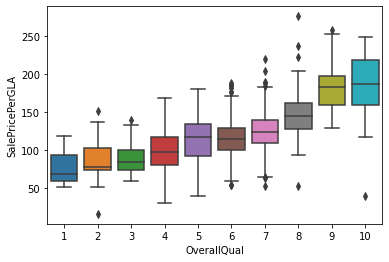

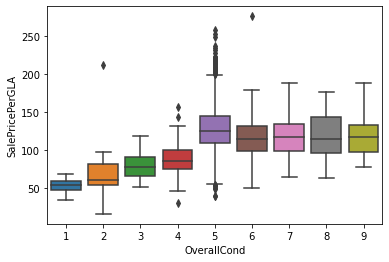

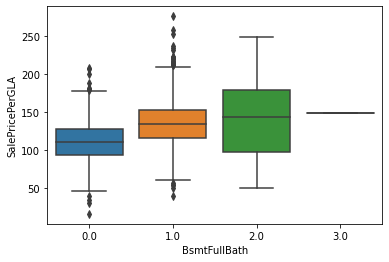

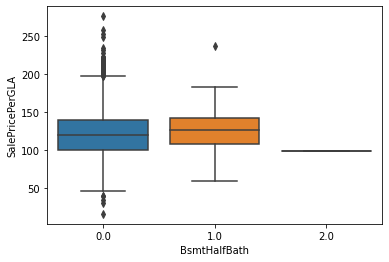

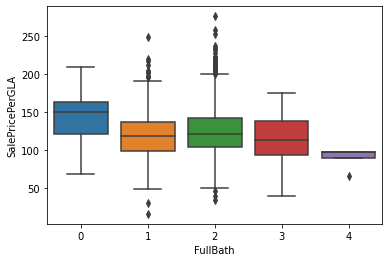

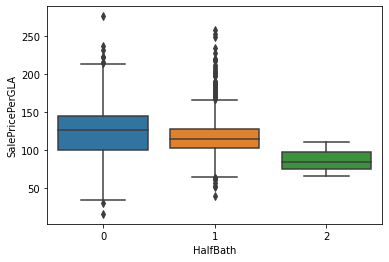

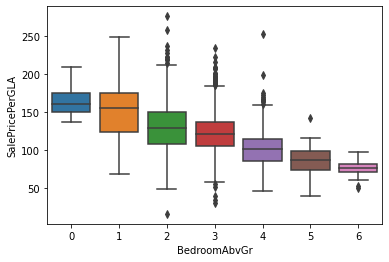

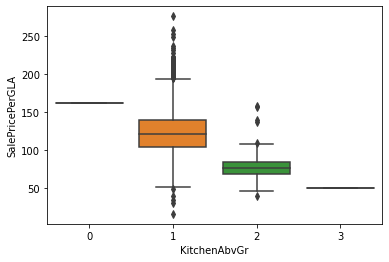

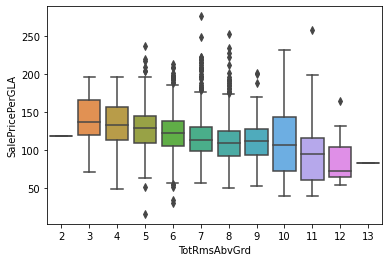

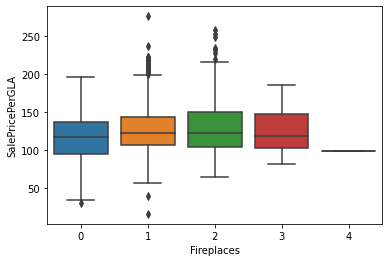

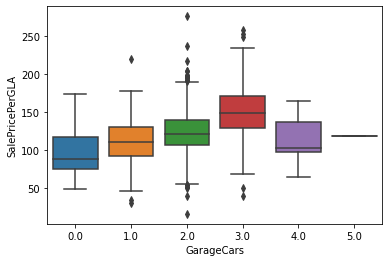

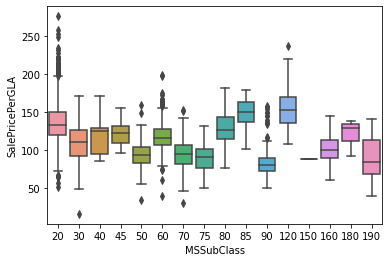

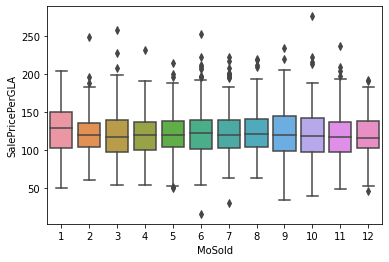

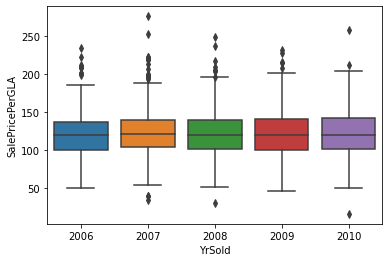

In [27]:
for x in x2:
    data = pd.concat([housing['SalePricePerGLA'], housing[x]], axis=1)
    ax = sns.boxplot(x=x, y=y1, data=data)   
    plt.show()

#### Some features had outliers, and some features did not have many observations, but we agreed to keep them at the moment, but will keep an eye on them.

In [20]:
housing[['MasVnrArea','TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageArea', 'GarageCars', 'BsmtHalfBath', 'BsmtFullBath']].describe()

,MasVnrArea,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,GarageArea,GarageCars,BsmtHalfBath,BsmtFullBath
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000
mean,98.421857,1036.607521,538.086173,53.325499,445.195848,467.300431,1.749706,0.060713,0.437133
std,174.912632,418.310828,424.504056,174.580591,429.556578,207.572034,0.738831,0.240485,0.518528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,791.000000,215.000000,0.000000,0.000000,319.000000,1.000000,0.000000,0.000000
50%,0.000000,978.000000,447.000000,0.000000,385.000000,474.000000,2.000000,0.000000,0.000000
75%,156.000000,1265.000000,781.000000,0.000000,733.000000,576.000000,2.000000,0.000000,1.000000
max,1600.000000,3206.000000,2336.000000,1526.000000,2288.000000,1488.000000,5.000000,2.000000,3.000000


### Starting to get F-scores and P-values on a very simple linear model for numeric features (more for where to start looking later rather than for elimination)

In [33]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression

### We agreed to look at both Total Sales Price and Price per Square Foot as our target going in

In [34]:
X = housing[['GrLivArea','SalePrice','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']]
y1 = housing["SalePricePerGLA"]
y2 = housing['SalePrice']

In [37]:
linselector1 = SelectKBest(f_classif, k='all').fit(X,y1)
linear_ttl = sorted(list(zip(linselector1.pvalues_,X.columns)))
linear_ttl_scr = sorted(list(zip(linselector1.scores_,X.columns)),reverse=True)
linselector2 = SelectKBest(f_classif, k='all').fit(X,y2)
linear_psf = sorted(list(zip(linselector2.pvalues_,X.columns)))
linear_psf_scr = sorted(list(zip(linselector2.scores_,X.columns)),reverse=True)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


### Initial P-Values and F Scores for both total Sale Price and Price per Sq Ft

In [42]:
linear_feats_sig=[]
linear_psf
for elm in linear_psf:
    if elm[0]<.05:
        linear_feats_sig.append(elm[1])
print('Significant (p-value<.05) linear features:',linear_feats_sig)

Significant (p-value<.05) linear features: ['SalePrice', 'OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'LotArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', '2ndFlrSF', 'OpenPorchSF', 'LowQualFinSF', 'HalfBath', 'WoodDeckSF', 'OverallCond', 'BedroomAbvGr']


In [47]:
linear_ttl #p-values of numerical features on a total sale price regression
linear_psf #p-values of numerical features on a $ per square foot regression
linear_feats_sig #p-values of numerical features on a $ per square foot regression AND p-value is <.05

['SalePrice',
 'OverallQual',
 'GrLivArea',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'LotArea',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'Fireplaces',
 '2ndFlrSF',
 'OpenPorchSF',
 'LowQualFinSF',
 'HalfBath',
 'WoodDeckSF',
 'OverallCond',
 'BedroomAbvGr']

### Code for the numerics Plotted against the Price per Square Foot

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


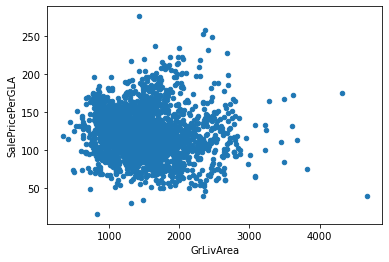

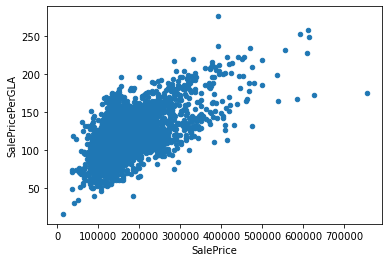

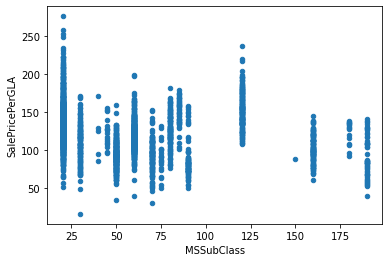

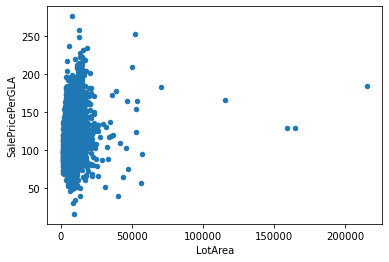

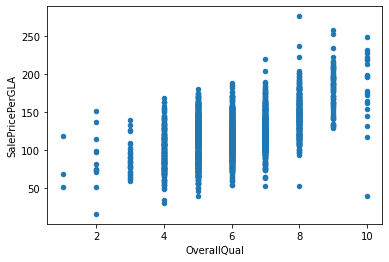

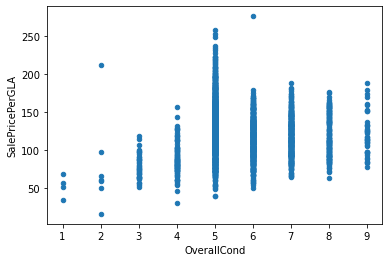

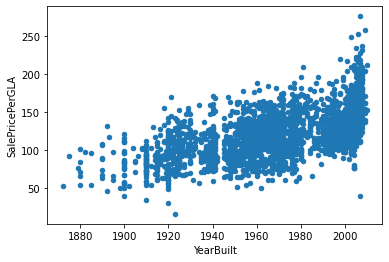

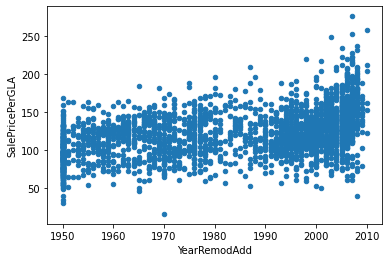

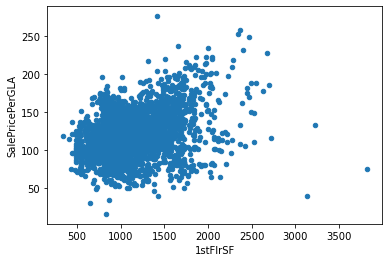

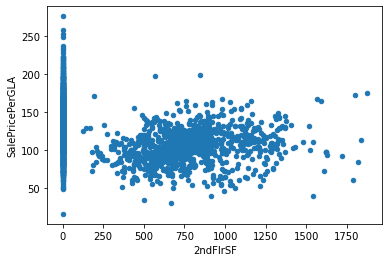

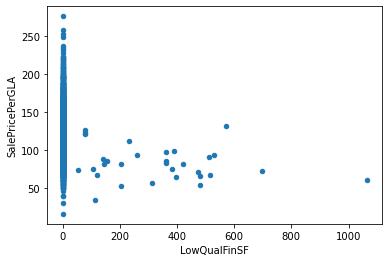

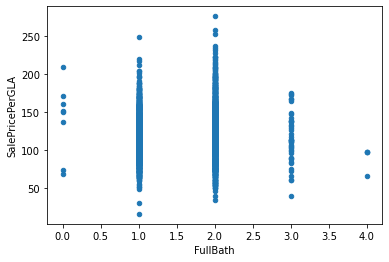

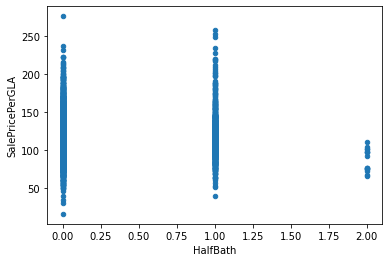

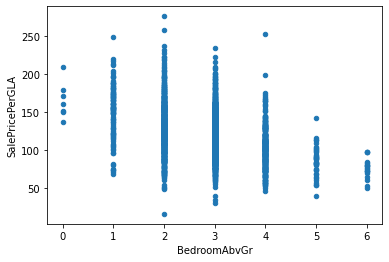

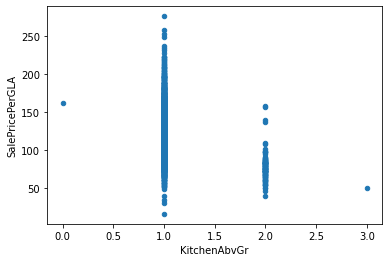

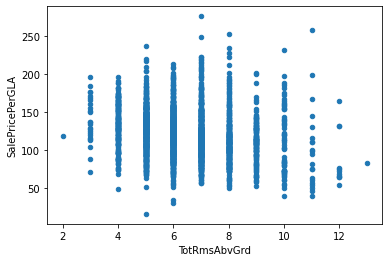

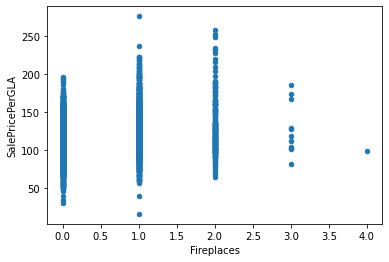

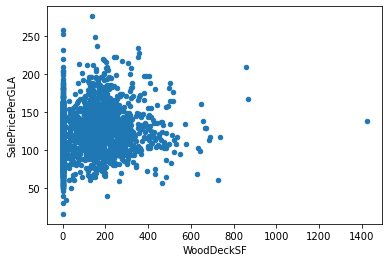

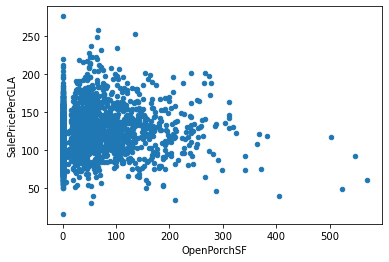

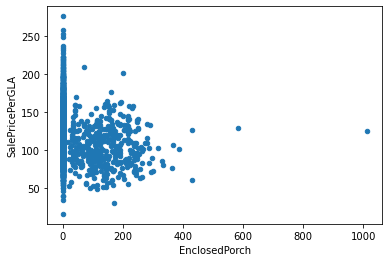

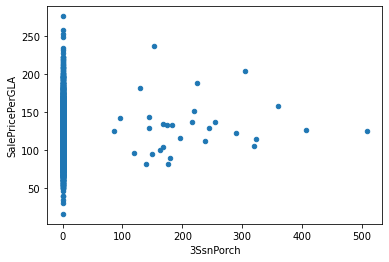

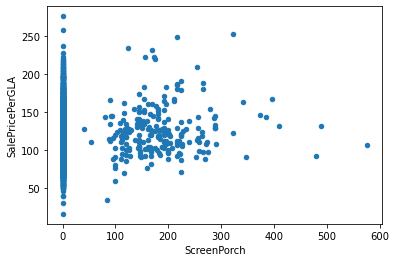

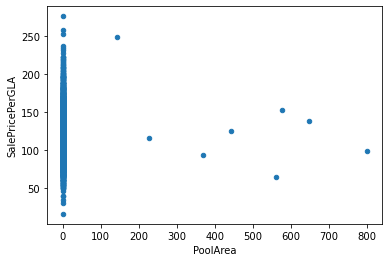

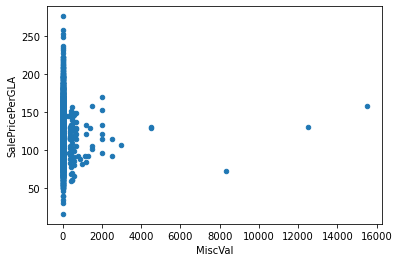

In [48]:
for col in X:  ## Scatter plots of numericals versus $ per Sq Ft.
    housing.plot.scatter(x=col,y='SalePricePerGLA')